In [1]:
from ai2thor.controller import Controller
from ai2thor.platform import CloudRendering
from butler.controller import ButController as Controller
from butler.controller import MultiButController as MultiController
import matplotlib.pyplot as plt
from butler.utils import *
import pandas as pd

https://ai2thor.allenai.org/ithor/documentation/environment-state

Event Response
- metadata: dict[str]
- frame: RGB array
- cv2img: BGR array
- depth_frame: distance from agent to each pixel
- instance_segmentation_frame



In [2]:
controller = Controller(scene="FloorPlan10")
event = controller.last_event
metadata = event.metadata

In [5]:
controller.event.metadata['agent']

{'name': 'agent',
 'position': {'x': 0.0, 'y': 0.9009992480278015, 'z': -1.25},
 'rotation': {'x': -0.0, 'y': 90.0, 'z': 0.0},
 'cameraHorizon': -0.0,
 'isStanding': True,
 'inHighFrictionArea': False}

In [6]:
print(event)
print(metadata.keys())

<ai2thor.server.Event at 0x7f64c8cadbb0
    .metadata["lastAction"] = Initialize
    .metadata["lastActionSuccess"] = True
    .metadata["errorMessage"] = "
    .metadata["actionReturn"] = {'cameraNearPlane': 0.009999999776482582, 'cameraFarPlane': 20.0}
>
dict_keys(['objects', 'isSceneAtRest', 'agent', 'heldObjectPose', 'arm', 'fov', 'cameraPosition', 'cameraOrthSize', 'thirdPartyCameras', 'collided', 'collidedObjects', 'inventoryObjects', 'sceneName', 'lastAction', 'errorMessage', 'errorCode', 'lastActionSuccess', 'screenWidth', 'screenHeight', 'agentId', 'depthFormat', 'colors', 'flatSurfacesOnGrid', 'distances', 'normals', 'isOpenableGrid', 'segmentedObjectIds', 'objectIdsInBox', 'actionIntReturn', 'actionFloatReturn', 'actionStringsReturn', 'actionFloatsReturn', 'actionVector3sReturn', 'visibleRange', 'currentTime', 'sceneBounds', 'actionReturn'])


In [7]:
controller.objects

,objectType,objectId,name,position[x],position[y],position[z],rotation[x],rotation[y],rotation[z],distance,...,openness,pickupable,isPickedUp,moveable,mass,salientMaterials,assetId,parentReceptacles,controlledObjects,isMoving
1,StoveBurner,StoveBurner|+00.84|+00.92|-01.10,StoveBurner_7e32c1bb,0.8420,0.9193,-1.0985,-0.0000,0.0000,0.0000,0.8557,...,0.0,False,False,False,0.000,None,,None,None,False
3,StoveBurner,StoveBurner|+01.08|+00.92|-01.50,StoveBurner_071647e1,1.0776,0.9193,-1.5042,-0.0000,0.0000,0.0000,1.1073,...,0.0,False,False,False,0.000,None,,None,None,False
4,StoveBurner,StoveBurner|+00.84|+00.92|-01.50,StoveBurner_bd86687e,0.8420,0.9193,-1.5042,-0.0000,0.0000,0.0000,0.8797,...,0.0,False,False,False,0.000,None,,None,None,False
6,Cabinet,Cabinet|+00.95|+02.16|-02.38,Cabinet_2fe8d304,0.9490,2.1600,-2.3760,-0.0000,270.0000,0.0000,1.9374,...,0.0,False,False,False,0.000,None,,None,None,False
8,CounterTop,CounterTop|+00.93|+00.95|-00.21,CounterTop_cbb462c5,0.9320,0.9468,-0.2080,-0.0000,0.0000,0.0000,1.3987,...,0.0,False,False,False,0.000,None,,None,None,False
9,StoveBurner,StoveBurner|+01.08|+00.92|-01.10,StoveBurner_5fa31b8b,1.0776,0.9193,-1.0985,-0.0000,0.0000,0.0000,1.0884,...,0.0,False,False,False,0.000,None,,None,None,False
13,CounterTop,CounterTop|+00.93|+00.95|-02.05,CounterTop_a5da87e4,0.9320,0.9468,-2.0510,-0.0000,0.0000,0.0000,1.2298,...,0.0,False,False,False,0.000,None,,None,None,False
14,Cabinet,Cabinet|+00.95|+02.44|-01.78,Cabinet_404a8683,0.9488,2.4400,-1.7800,-0.0000,270.0000,0.0000,1.8841,...,0.0,False,False,False,0.000,None,,None,None,False
16,Cabinet,Cabinet|+00.95|+02.16|-00.76,Cabinet_504a60f1,0.9490,2.1600,-0.7583,-0.0000,270.0000,0.0000,1.6515,...,0.0,False,False,False,0.000,None,,None,None,False
26,StoveKnob,StoveKnob|+00.67|+00.90|-01.37,StoveKnob_9c0cf3b3,0.6737,0.8997,-1.3739,314.7468,90.0000,180.0000,0.6850,...,0.0,False,False,False,0.000,None,,None,[StoveBurner|+01.08|+00.92|-01.50],False


In [8]:
print('Number of objects in the current scene / view:', len(controller.objects))
print('Number of objects in the entire floorplan:', len(controller.all_objects))

Number of objects in the current scene / view: 21
Number of objects in the entire floorplan: 67


In [9]:
controller.attributes

Index(['objectType', 'objectId', 'name', 'position[x]', 'position[y]',
       'position[z]', 'rotation[x]', 'rotation[y]', 'rotation[z]', 'distance',
       'visible', 'isInteractable', 'receptacle', 'toggleable', 'isToggled',
       'breakable', 'isBroken', 'canFillWithLiquid', 'isFilledWithLiquid',
       'fillLiquid', 'dirtyable', 'isDirty', 'canBeUsedUp', 'isUsedUp',
       'cookable', 'isCooked', 'temperature', 'isHeatSource', 'isColdSource',
       'sliceable', 'isSliced', 'openable', 'isOpen', 'openness', 'pickupable',
       'isPickedUp', 'moveable', 'mass', 'salientMaterials', 'assetId',
       'parentReceptacles', 'controlledObjects', 'isMoving'],
      dtype='object')

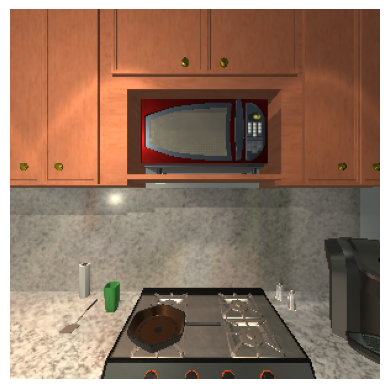

In [11]:
controller.render();

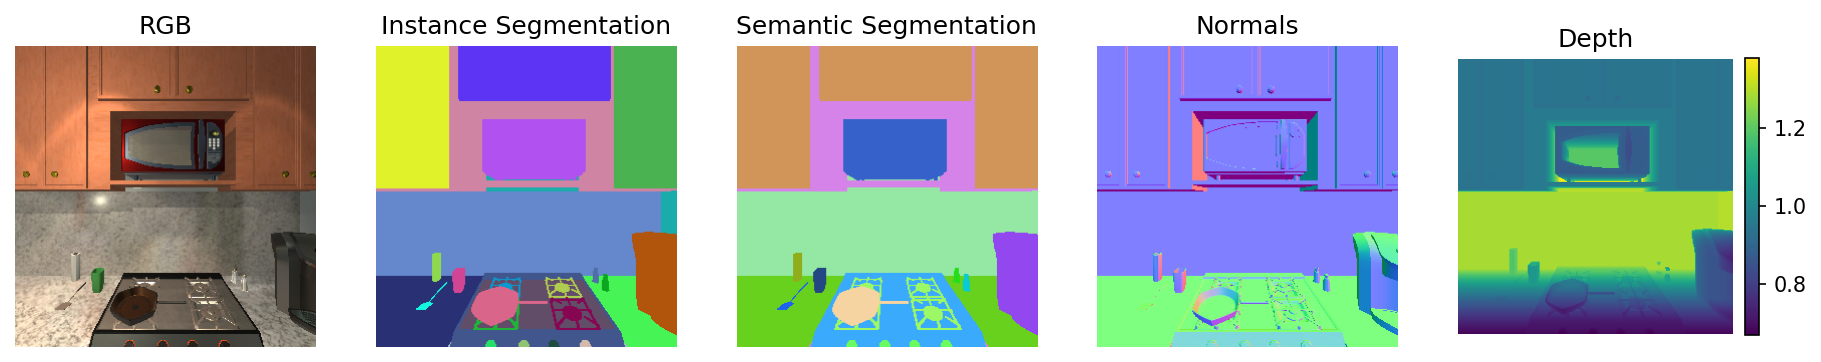

In [12]:
controller.plot_frames()

In [13]:
controller.reset()
frames = [
    controller.step(action="RotateLeft", degrees=5).frame
    for _ in range(230 // 5)
]
show_video(frames, fps=5)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [14]:
controller.reset();
controller.get_obj_by_name('StoveBurner_7e32c1bb')

,objectType,objectId,name,position[x],position[y],position[z],rotation[x],rotation[y],rotation[z],distance,...,openness,pickupable,isPickedUp,moveable,mass,salientMaterials,assetId,parentReceptacles,controlledObjects,isMoving
1,StoveBurner,StoveBurner|+00.84|+00.92|-01.10,StoveBurner_7e32c1bb,0.842,0.9193,-1.0985,-0.0,0.0,0.0,0.8557,...,0.0,False,False,False,0.0,None,,None,None,False


In [50]:
controller.get_obj_by_id('StoveBurner|+00.84|+00.92|-01.10')

,objectType,objectId,name,position[x],position[y],position[z],rotation[x],rotation[y],rotation[z],distance,...,openness,pickupable,isPickedUp,moveable,mass,salientMaterials,assetId,parentReceptacles,controlledObjects,isMoving
1,StoveBurner,StoveBurner|+00.84|+00.92|-01.10,StoveBurner_7e32c1bb,0.842,0.9193,-1.0985,-0.0,0.0,0.0,0.8557,...,0.0,False,False,False,0.0,None,,None,None,False


https://ai2thor.allenai.org/ithor/documentation/objects/object-types/

Properties of objects are divided into three categories:
- actionable: the agent can change it directly
- material: temperature, mass, salientMaterials
- Receptacle: can be placed / interact with other objects


But material properties are important for learning the correct policy. For example, lifting
heavier weight might require a slightly different policy.

Can we learn the property segmentation?

In [16]:
print('check out the affordance for StoveBurner and StoveKnob')
controller.get_actionable_properties('StoveBurner'), controller.get_actionable_properties('StoveKnob')
print('We can toggle the StoveKnob!')

check out the affordance for StoveBurner and StoveKnob
We can toggle the StoveKnob!


In [18]:
controller.objects_by_type("StoveBurner")

,objectType,objectId,name,position[x],position[y],position[z],rotation[x],rotation[y],rotation[z],distance,...,openness,pickupable,isPickedUp,moveable,mass,salientMaterials,assetId,parentReceptacles,controlledObjects,isMoving
0,StoveBurner,StoveBurner|+00.84|+00.92|-01.10,StoveBurner_7e32c1bb,0.8420,0.9193,-1.0985,-0.0,0.0,0.0,0.8557,...,0.0,False,False,False,0.0,None,,None,None,False
1,StoveBurner,StoveBurner|+01.08|+00.92|-01.50,StoveBurner_071647e1,1.0776,0.9193,-1.5042,-0.0,0.0,0.0,1.1073,...,0.0,False,False,False,0.0,None,,None,None,False
2,StoveBurner,StoveBurner|+00.84|+00.92|-01.50,StoveBurner_bd86687e,0.8420,0.9193,-1.5042,-0.0,0.0,0.0,0.8797,...,0.0,False,False,False,0.0,None,,None,None,False
3,StoveBurner,StoveBurner|+01.08|+00.92|-01.10,StoveBurner_5fa31b8b,1.0776,0.9193,-1.0985,-0.0,0.0,0.0,1.0884,...,0.0,False,False,False,0.0,None,,None,None,False


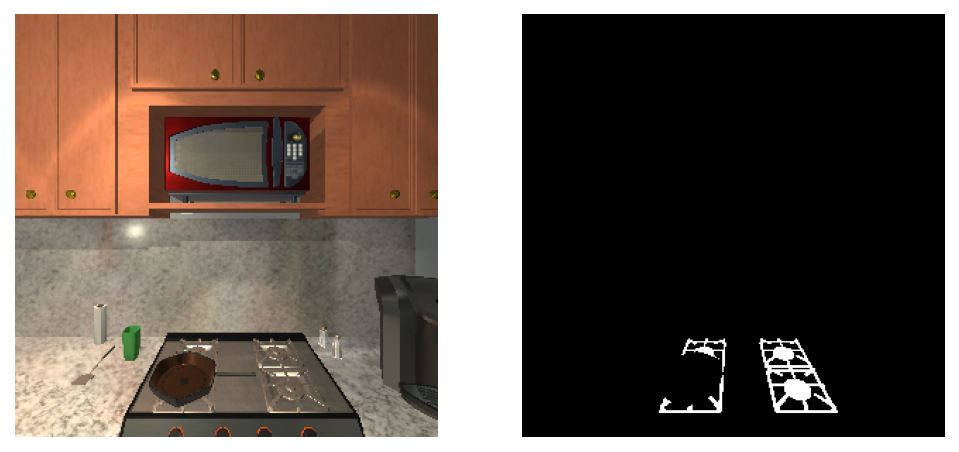

In [19]:
side_by_side(controller.render(plot=False), controller.mask_object_type('StoveBurner', plot=False), cmap_dict={1: 'gray'});

## Agent's actions

- movement: (https://ai2thor.allenai.org/ithor/documentation/navigation)
- moveAhead, moveBack, moveLeft, moveRight, (like grid-world)
- rotateLeft, rotateRight, 
- lookUp, lookDown: change the camera angle to get different views of the scene
- might be important for object search ect...
- crouch, stand: change the height of the agent
- done: end the episode

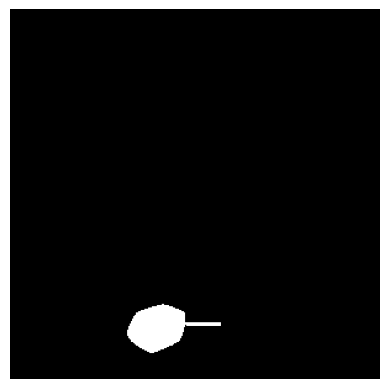

In [3]:
# trying to pick up the pan
controller.mask_object_type('Pan');

In [4]:
controller.get_actionable_properties('Pan')

['pickupable', 'receptacle', 'dirtyable']

In [5]:
df = pd.DataFrame(controller.event.objects_by_type('Pan'))
df

,name,position,rotation,visible,isInteractable,receptacle,toggleable,isToggled,breakable,isBroken,...,receptacleObjectIds,distance,objectType,objectId,assetId,parentReceptacles,controlledObjects,isMoving,axisAlignedBoundingBox,objectOrientedBoundingBox
0,Pan_94d14525,"{'x': 0.8484882712364197, 'y': 0.9459495544433...","{'x': -4.056494617543649e-06, 'y': 3.687753633...",True,True,True,False,False,False,False,...,[],0.866487,Pan,Pan|+00.85|+00.95|-01.08,Pan_10,"[StoveBurner|+00.84|+00.92|-01.10, StoveBurner...",None,False,"{'cornerPoints': [[0.9904882907867432, 0.99271...","{'cornerPoints': [[0.9904864430427551, 0.94621..."


In [52]:
controller.reset()
frame_before = controller.render(plot=False)
info = controller.step(action='PickupObject', objectId='Pan|+00.85|+00.95|-01.08',
manualInteract=False)
info, info.metadata['lastActionSuccess']

(<ai2thor.server.Event at 0x7fbae0bdf850
     .metadata["lastAction"] = PickupObject
     .metadata["lastActionSuccess"] = True
     .metadata["errorMessage"] = "
     .metadata["actionReturn"] = Pan|+00.85|+00.95|-01.08
 >,
 True)

before & after picking up the pan


31    True
Name: isPickedUp, dtype: bool

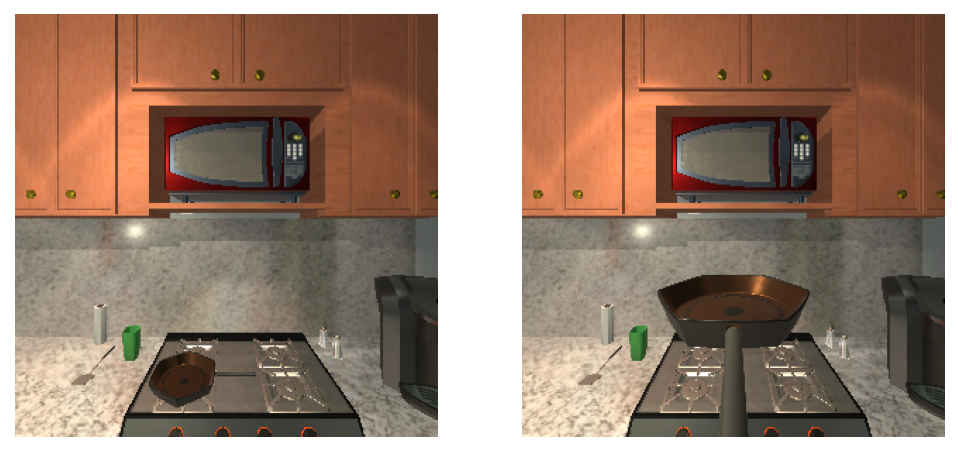

In [53]:
frame_after = controller.render(plot=False);
print('before & after picking up the pan')
side_by_side(frame_before, frame_after);
# verify that the pan is picked up
controller.get_obj_by_id('Pan|+00.85|+00.95|-01.08')['isPickedUp']

In this case, the effect of the action can be seen through the pixel changes!

In [79]:
controller.reset()
print('all stove knobs in the current view')
knobs = controller.objects_by_type('StoveKnob', only_visible=True)
knobs


all stove knobs in the current view


,objectType,objectId,name,position[x],position[y],position[z],rotation[x],rotation[y],rotation[z],distance,...,openness,pickupable,isPickedUp,moveable,mass,salientMaterials,assetId,parentReceptacles,controlledObjects,isMoving
0,StoveKnob,StoveKnob|+00.67|+00.90|-01.37,StoveKnob_9c0cf3b3,0.6737,0.8997,-1.3739,314.7468,90.0,180.0,0.6850,...,0.0,False,False,False,0.0,None,,None,[StoveBurner|+01.08|+00.92|-01.50],False
1,StoveKnob,StoveKnob|+00.67|+00.90|-01.52,StoveKnob_43ec6a71,0.6737,0.8997,-1.5196,314.7468,90.0,180.0,0.7257,...,0.0,False,False,False,0.0,None,,None,[StoveBurner|+00.84|+00.92|-01.50],False
2,StoveKnob,StoveKnob|+00.67|+00.90|-01.09,StoveKnob_5dfdfc01,0.6737,0.8997,-1.0863,314.7468,90.0,180.0,0.6933,...,0.0,False,False,False,0.0,None,,None,[StoveBurner|+00.84|+00.92|-01.10],False
3,StoveKnob,StoveKnob|+00.67|+00.90|-01.24,StoveKnob_2dc524db,0.6737,0.8997,-1.2377,314.7468,90.0,180.0,0.6738,...,0.0,False,False,False,0.0,None,,None,[StoveBurner|+01.08|+00.92|-01.10],False


In [80]:
print('stove knobs we can interact with')
controller.objects_by_type('StoveKnob', only_interactable=True)

stove knobs we can interact with


""


In [3]:
controller.reset()
#stove_knob = 'StoveKnob|+00.67|+00.90|-01.37' # stove_knob with the pan on
#stove_knob = 'StoveKnob|+00.67|+00.90|-01.52' # stove_knob without the pan
#stove_knob = 'StoveKnob|+00.67|+00.90|-01.09'
stove_knob = 'StoveKnob|+00.67|+00.90|-01.24'
# try to toggle the stove knob
controller.step(action='ToggleObjectOn', objectId=stove_knob)
# lastActionSuccess would be False

<ai2thor.server.Event at 0x7f4a9de11e80
    .metadata["lastAction"] = ToggleObjectOn
    .metadata["lastActionSuccess"] = False
    .metadata["errorMessage"] = "NullReferenceException: Target object not found within the specified visibility.
    .metadata["actionReturn"] = None
>

In [4]:
# agent should look down and try to turn the knob again
controller.reset()
controller.step(action='LookDown')
before_frame = controller.render(plot=False)
print('interactable stove knobs in the current view:')
controller.objects_by_type('StoveKnob', only_interactable=True)


interactable stove knobs in the current view:


,objectType,objectId,name,position[x],position[y],position[z],rotation[x],rotation[y],rotation[z],distance,...,openness,pickupable,isPickedUp,moveable,mass,salientMaterials,assetId,parentReceptacles,controlledObjects,isMoving
0,StoveKnob,StoveKnob|+00.67|+00.90|-01.37,StoveKnob_9c0cf3b3,0.6737,0.8997,-1.3739,314.7468,90.0,180.0,0.6850,...,0.0,False,False,False,0.0,None,,None,[StoveBurner|+01.08|+00.92|-01.50],False
1,StoveKnob,StoveKnob|+00.67|+00.90|-01.52,StoveKnob_43ec6a71,0.6737,0.8997,-1.5196,314.7468,90.0,180.0,0.7257,...,0.0,False,False,False,0.0,None,,None,[StoveBurner|+00.84|+00.92|-01.50],False
2,StoveKnob,StoveKnob|+00.67|+00.90|-01.09,StoveKnob_5dfdfc01,0.6737,0.8997,-1.0863,314.7468,90.0,180.0,0.6933,...,0.0,False,False,False,0.0,None,,None,[StoveBurner|+00.84|+00.92|-01.10],False
3,StoveKnob,StoveKnob|+00.67|+00.90|-01.24,StoveKnob_2dc524db,0.6737,0.8997,-1.2377,314.7468,90.0,180.0,0.6738,...,0.0,False,False,False,0.0,None,,None,[StoveBurner|+01.08|+00.92|-01.10],False


In [5]:
controller.step(action='ToggleObjectOn', objectId=stove_knob)
# lastActionSuccess should be True now

<ai2thor.server.Event at 0x7f4ab41178b0
    .metadata["lastAction"] = ToggleObjectOn
    .metadata["lastActionSuccess"] = True
    .metadata["errorMessage"] = "
    .metadata["actionReturn"] = None
>

before and after the action of turning the knob on look exactly the same, which is why we should probably need an interactive reward function.


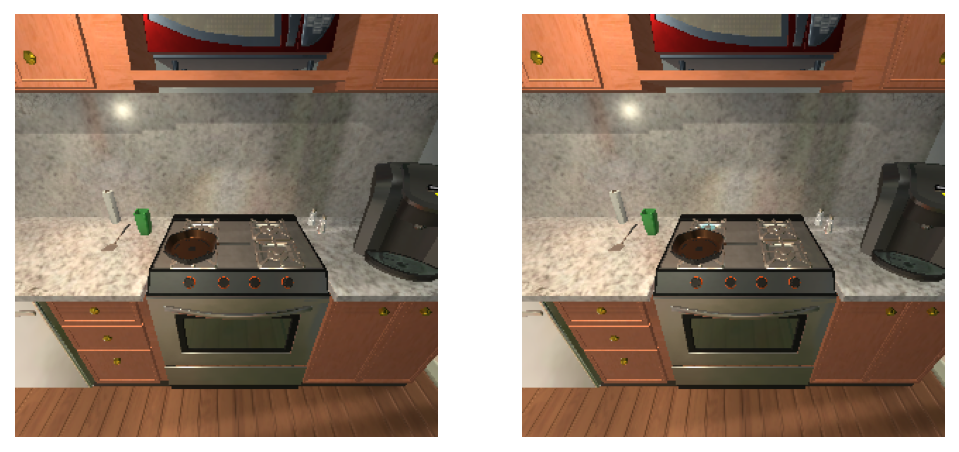

In [6]:
after_frame = controller.render(plot=False)
side_by_side(before_frame, after_frame)
print('before and after the action of turning the knob on look exactly the same, which is why we should probably need an interactive reward function.')

In [7]:
# verify that the stove burner is fact on
controller.get_obj_by_id(stove_knob)['isToggled']

29    True
Name: isToggled, dtype: bool

# Pubs
https://ai2thor.allenai.org/publications/#filters

# Scenes 
https://ai2thor.allenai.org/ithor/documentation/scenes

```
kitchens = [f"FloorPlan{i}" for i in range(1, 31)]
living_rooms = [f"FloorPlan{200 + i}" for i in range(1, 31)]
bedrooms = [f"FloorPlan{300 + i}" for i in range(1, 31)]
bathrooms = [f"FloorPlan{400 + i}" for i in range(1, 31)]

scenes = kitchens + living_rooms + bedrooms + bathrooms

```

In [ ]:
Controller.get_scenes('bathroom')

In [ ]:
# test out one bathroom scene
controller = Controller(scene="FloorPlan401_physics")
controller.render();

In [ ]:
# looking around the bathroom!
# NOTE: in floorplan401, there's a camera in the bathroom (what? why??)
controller.reset()
frames = [
    controller.step(action="RotateLeft", degrees=5).frame
    for _ in range(360 // 5)
]
show_video(frames, fps=5)

In [ ]:
# https://github.com/allenai/ai2thor/issues/156
# try to remove the object (creepy camera) from the scene!
controller.reset()
for i in range(14):
    controller.step(action="RotateLeft", degrees=5)

# BUG: why isn't the camera visible in the instance/ semantic segmentation?
controller.plot_frames();

In [ ]:
controller.reset()
controller.render();

In [ ]:
controller.reset()
controller.objects[(controller.objects['visible'] == False)]

In [ ]:
controller.plot_frames()

In [ ]:
# why is the floor segmented into two parts? What's the greenish thing?
plt.imshow(controller.event.instance_segmentation_frame);

In [ ]:
# instance segmentation is NOT perfect
controller.reset()
for i in range(10):
    controller.step(action="RotateRight", degrees=5).frame

controller.plot_frames();

In [ ]:
controller.event.color_to_object_id

In [ ]:
controller.visible_objects

In [ ]:
list(controller.event.instance_detections2D.keys())

In [ ]:
controller.plot_frames();

In [ ]:
# https://github.com/allenai/ai2thor/issues/815 (visibility)

# Agent attributes

https://ai2thor.allenai.org/ithor/documentation/navigation/

- Position: (x, y, z)
- Rotation: (x, y, z)
- horizon: camera angle {-30, 0, 30, 60}
- standing: true/false

In [ ]:
controller.agent

# Multi-agent

https://github.com/allenai/ai2thor/issues/533

https://colab.research.google.com/drive/1ityVEzHNN7k4Xek7-yfX_x_VRWNtO2wz?usp=sharing#scrollTo=Rhe2zbQHFztC


In [ ]:
controller = MultiController(
    scene='FloorPlan16',
    agentCount=2,
)

In [ ]:
controller.render();

In [ ]:
controller.render_agents();

In [ ]:
controller.plot_frames();

In [ ]:
controller.choose_agent(1)
controller.plot_frames();

# ManipularThor

Finer action control

In [ ]:
controller.last_event.metadata['agent']